In [1]:
from infsynth import *
import librosa.display
import matplotlib.pyplot as plt

In [3]:
lead_env = ad([0.01, 0.1],[2, 0.01]) | dc(0, T=1)
def lead(freq):
    return lpf(saw(freq) * lead_env, 1000) * 0.1

play(lead(440), 10)
lead(440).T
lead_env.T

3.01

In [4]:
freq= ad([0.01, 0.5], [0.1, 0.1], T=2) * 50 + 60
bd_env = ad([0.01, 0.5], [0.4, 0.1], T=2)

bd = lpf(sin(freq)* bd_env, 100)
bar1 = bd.imp('10101010')
bar2 = bd.imp('111000')
bar3 = bd.imp('10111101')
play(bar1|bar2|bar3, 20)

In [81]:
freq= ad([0.01, 0.1], [0.1, 0.1], T=2) * 50 + 60
bd_env = ad([0.01, 0.5], [0.4, 0.1], T=2)
lead_env = ad(T=2)
bd = lpf(sin(freq)* bd_env, 100) 
lead = lpf(saw(50) * lead_env, 1000) * 0.1

drum = imp(bd, '1111')
melody = imp(lead, '1010 0010 1001 0010')
song = drum + melody

play(song, 10)

In [57]:
o = -sin(440)

TypeError: bad operand type for unary -: 'Analog'

In [82]:
play(sin(freq) * bd_env, 10)

In [77]:
lead_env = con(
    [ad(0.01, 0.2), dc(0)],
    [0.21, 0.09]
)
B = 'A-10'
notes = ['G4', 'G4', 'A4', 'G4', 'C5', 'B4']
L = [1, 1, 2, 2, 2, 2]
notes = list(map(librosa.note_to_hz, notes))
notes = list(map(float, notes))
o = lpf(seq(sin, notes, L, T=0.3) * lead_env, 1000/fs)
play(o, 10)

TypeError: attack() argument after * must be an iterable, not float

In [6]:
from librosa import load
ol = []
for d in ['bd', 'ch', 'clap', 'ht', 'lt', 'oh', 'sd']:
    o, fs = load(f'../../learn/glicol/js/assets/808{d}.wav')
    o = sampler(o, fs)
    o = o | dc(0, 2-o.T)
    ol.append(o)

bar1 = seq(ol, '1123 1023')
bar2 = seq(ol, '111 000')
bar3 = seq(ol, '1351 2513')
bar4 = seq(ol, '111 000')
o = freeze(bar1|bar2|bar3|bar4)
play(o, 10)

In [63]:
from librosa import note_to_hz
def seq(analog_list, seq=None, on=None, off='-', rnd='?'):
    if on is None:
        assert len(analog_list) < 16
        on = '123456789abcdef'[:len(analog_list)]
    else:
        assert len(analog_list) == len(on)

    on = list(on)
    all_sym = on + [off] + [rnd]
    if seq is None:
        seq = on
    
    O = dc(0)
    seq = [s for s in seq if s in all_sym]
    L = len(seq)
    for i, s in enumerate(seq):
        if s in on: 
            A = analog_list[on.index(s)]
            O += A >> (i / L * A.T)
        if s == rnd:
            A = random.choice(analog_list)
            O += A >> (i / L * A.T)
    return O

ol = []
on = []
for n in range(6):
    for note in ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']:
        note = note + str(n)
        on.append(note)
        o = squ(float(note_to_hz(note))) * ad([0.01, 0.1], [0.5, 0.1]) 
        o = lpf(o, 400)
        o = o|dc(0, 1.5)
        ol.append(o)

bar1 = seq(ol, ['A4', 'E5', 'E5', '-', '-', 'A4'], on=on)
bar2 = seq(ol, ['A4', 'D5', 'D5', '-', '-', 'A4'], on=on)
bar3 = seq(ol, ['A4', 'E5', 'E5', 'G5', 'F#5', 'D5'], on=on)
bar4 = seq(ol, ['E5', '-', '-', '-', '-', '-'], on=on)
sec1 = bar1 | bar2 | bar3 | bar4

bar1 = seq(ol, ['A4', 'E5', 'E5', '-', '-', 'A4'], on=on)
bar2 = seq(ol, ['A4', 'D5', 'D5', '-', '-', '-'], on=on)
bar3 = seq(ol, ['A4', 'B4', 'C5', 'E5', 'D5', 'B4'], on=on)
bar4 = seq(ol, ['A4', 'G4', 'A4', '-', '-', '-'], on=on)
sec2 = bar1 | bar2 | bar3 | bar4 

play(sec1 | sec2, 30)
# plot(sec1, 0.1)

In [67]:
play(bar3)

In [8]:
from librosa import load

def t1():
    bd, fs = load('../../learn/glicol/js/assets/808bd.wav')
    bd = sampler(bd, fs)
    bd = bd | dc(0, T=2 - bd.T)
    bar1 = bd.imp('11')
    bar2 = bd.imp('11')
    return bar1|bar2

def t2():
    ch, fs = load('../../learn/glicol/js/assets/808ch.wav')
    ch = sampler(ch, fs)
    ch = ch | dc(0, T=2 - ch.T)
    bar1 = ch.imp('01010101')
    bar2 = ch.imp('01010101')
    return bar1|bar2

def t3():
    sd, fs = load('../../learn/glicol/js/assets/808lt.wav')
    sd = sampler(sd, fs)
    sd = sd | dc(0, T=2 - sd.T)
    bar1 = sd.imp('00100010')
    bar2 = sd.imp('00100010')
    return bar1|bar2


play(t1() + t2() + t3(), 20)

ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred


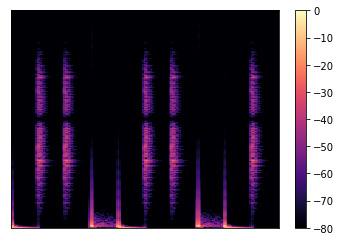

In [90]:
D = librosa.stft(o(np.arange(0, 2, 1 / 44100)))  # STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
plt.figure()
librosa.display.specshow(S_db)
plt.colorbar()

In [ ]:
m = sin(np.pi) * sinm(np.e)
plot(m, 100)

In [ ]:
o = sin(1 * 5 + 440)
o = 0.5 *o

In [ ]:
env = adsr(attack_time=0, decay_time=0, sustain_time=0, release_time=0.5)
o = sin(m * 20 + 150)
play(o * env, 10)
plot(o * env, 0.5)


In [58]:
o = (sin(440) + (squ(440) << 0.01)) * adsr()
play(basic_flanger(o, 0.2), 10)

In [ ]:
plot(squ(440), 0.01)

In [ ]:
env = adsr()
f = float(librosa.note_to_hz('C4'))
a = sin(f) * env
# b = saw(librosa.note_to_hz('D#4')) * adsr
# c = squ(librosa.note_to_hz('G4')) * adsr
# d = sin(librosa.note_to_hz('B4')) * adsr

# o = concat([a, b, c, d], [0.2, 0.2, 0.2, 0.2])
play(a, 4)
plot(a, 1)

In [ ]:
type(f)

In [ ]:
plot(o, 0.1)

In [ ]:
a = Square(440)
adsr = ADSR()
m = SinMod(1)
o = a * adsr
play(o, 2)

In [ ]:
plot(m1, 10)

In [ ]:
S = sin
a1 = S(int(librosa.note_to_hz('C4')))
a2 = S(int(librosa.note_to_hz('E4')))
a3 = S(int(librosa.note_to_hz('G4')))
# a4 = S(librosa.note_to_hz('C4'))
m1 = sawm(7)
m2 = sawm(3)
# m3 = SawMod(5/4)

In [ ]:
o = (a1 + a2 + a3) * m1 * m2 * dc(1 / 4)
plot(o << 0.5, t=12)
play(o, t=12)

# o1 = (a1 + a2 + a3 + a4) *m1 * m2 * DC(1)
# play(o, t=3)

In [ ]:
a = Sin(440)
b = Sin(440)

In [ ]:
o = a.conv(b) * DC(1 / 15000)


In [ ]:
plot(o, t=0.1)
# play(o)

In [ ]:
import numpy as np

In [ ]:
x = np.array([-1234, 234, 34123])
np.piecewise(x, [x < 0, (x < 123512352) & (x > -12341)], [1, 0])


In [ ]:
x = np.array([1, 2, 3])
np.stack([x, x]).shape

In [ ]:
from sympy import *

In [ ]:
x, y = symbols('x y')
expr = exp(x) * sin(x) + exp(x) * cos(x)


In [ ]:
i_expr = integrate(expr, x)

In [ ]:
i_expr.evalf(subs={x: 19})


In [ ]:
np.concatenate

In [ ]:
inf.sin(44)

In [ ]:
op.concat

In [ ]:
np.array

In [ ]:
np.array([1, 2, 3]).astype

In [ ]:
a = lambda x: x


In [ ]:
np.array

In [ ]:
scipy.signal.chri

In [ ]:
object.__div__

In [ ]:
arr1 = np.random.rand(100000000)
arr2 = np.repeat(np.pi, 100000000)

In [ ]:
import math

In [ ]:
librosa.note_to_hz('C-10')

In [9]:
note_to_hz('A')

27.5